<a href="https://colab.research.google.com/github/soniyakumari09/soniyakumari09/blob/main/Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


How we can help here?

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it.

Indian states with source and destination delivery count

*Destination state with delivery count

*Source state with delivery count

Analaysing through destination places in each state Which place have more delivery ?

Analaysing through source places in each state Which place have more delivery?

Analaysing through cities in each state Which city have more delivery ?

Which month proceed more trip?

Which route type use more time to reach destination?

Which state has more source center?

Which state has more destination center?

Weekday with most delivery of the product

Actual time v/s Time which computes the shortest path

Feature engineering

Calculate the time taken between od_start_time and od_end_time as time_difference

Hypothesis


Compare the difference between time_difference and start_scan_to_end_scan.

Actual_time aggregated value and OSRM time aggregated value

Actual_time aggregated value and segment actual time aggregated value

Osrm distance aggregated value and segment osrm distance aggregated value

Osrm time aggregated value and segment osrm time aggregated value

Find outliers in the numerical variables and check it using visual analysis

One-hot encoding of categorical variables

Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

Dataset Link:- https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

**Column Profiling:**

**data -** tells whether the data is testing or training data


**trip_creation_time** – Timestamp of trip creation

**route_schedule_uuid** – Unique Id for a particular route schedule

**route_type** – Transportation type

FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
Carting: Handling system consisting of small vehicles (carts)

**trip_uuid ** - Unique ID given to a particular trip (A trip may include different source and destination centers)

**source_center** - Source ID of trip origin

**source_name** - Source Name of trip origin

**destination_cente** – Destination ID

**destination_name**– Destination Name

**od_start_time** – Trip start time

**od_end_time** – Trip end time

**start_scan_to_end_scan** – Time taken to deliver from source to destination

**is_cutoff**– Unknown field

**cutoff_factor** – Unknown field

**cutoff_timestamp** – Unknown field

**actual_distance_to_destination** – Distance in Kms between source and destination warehouse

**actual_time** – Actual time taken to complete the delivery (Cumulative)

**osrm_time** – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

**osrm_distance** – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

**factor** – Unknown field

**segment_actual_time** – This is a segment time. Time taken by the subset of the package delivery

**segment_osrm_time**– This is the OSRM segment time. Time taken by the subset of the package delivery

**segment_osrm_distance** – This is the OSRM distance. Distance covered by subset of the package delivery


**segment_factor** – Unknown field

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT DATA

In [ ]:
df= pd.read_csv('/content/delhivery_data.csv')

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.keys()

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.shape

(144867, 24)

No of uniquness in each columns

In [ ]:
for i in df.columns:
  print( i,':', df[i].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 93180
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


**Missing Values & Data Cleaning**

In [ ]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In this whole data only source_name and destination_name have missing values. Destination_name have 261 missing value and Source_name have 293 missing value

In [ ]:
df.duplicated().sum()

0

No duplicate row in the data

**Key Observations :**

Data Shape: The DataFrame has 144867 rows and 24 columns.

Columns and Datatypes: Datase contains a mix of data types including object/string, float64, bool, and int64.

Missing Values: There are missing values in two columns, source_name 293 values and destination_name 261 values.

Duplicate Values: There are no duplicate records.

Unique Values:

Most columns have a high number of unique values, suggesting variety in the data. such as trip_creation_time - 14817, source_center -1508, and actual_distance_to_destination - 144515.

Time Columns: od_start_time and od_end_time have a very high number of unique values aprox 26369 each indicate high granularity or a large time range.

We need to identify features that are actually related to time to convert them to datetime data type.

In [ ]:
df[['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp', 'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time']]

,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp,actual_time,osrm_time,segment_actual_time,segment_osrm_time
0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:27:55,14.0,11.0,14.0,11.0
1,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:17:55,24.0,20.0,10.0,9.0
2,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:01:19.505586,40.0,28.0,16.0,7.0
3,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:39:57,62.0,40.0,21.0,12.0
4,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:33:55,68.0,44.0,6.0,5.0
...,...,...,...,...,...,...,...,...
144862,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:57:20,94.0,60.0,12.0,12.0
144863,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:31:18,120.0,76.0,26.0,21.0
144864,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:11:18,140.0,88.0,20.0,34.0
144865,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 20:53:19,158.0,98.0,17.0,27.0


In [ ]:
time_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']
for i in time_columns:
    df[i] = pd.to_datetime(df[i])

**Dropping unknown fields**

As the folowing field are unkown in the given data set, therefore removing the same for ease:

'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'

In [ ]:
df.drop(['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], axis= 1, inplace =True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

# Filling Missing Values

In [ ]:
df[['source_name','source_center', 'destination_center', 'destination_name']].head(20)

,source_name,source_center,destination_center,destination_name
0,Anand_VUNagar_DC (Gujarat),IND388121AAA,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
1,Anand_VUNagar_DC (Gujarat),IND388121AAA,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
2,Anand_VUNagar_DC (Gujarat),IND388121AAA,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
3,Anand_VUNagar_DC (Gujarat),IND388121AAA,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
4,Anand_VUNagar_DC (Gujarat),IND388121AAA,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
5,Khambhat_MotvdDPP_D (Gujarat),IND388620AAB,IND388320AAA,Anand_Vaghasi_IP (Gujarat)
6,Khambhat_MotvdDPP_D (Gujarat),IND388620AAB,IND388320AAA,Anand_Vaghasi_IP (Gujarat)
7,Khambhat_MotvdDPP_D (Gujarat),IND388620AAB,IND388320AAA,Anand_Vaghasi_IP (Gujarat)
8,Khambhat_MotvdDPP_D (Gujarat),IND388620AAB,IND388320AAA,Anand_Vaghasi_IP (Gujarat)
9,Khambhat_MotvdDPP_D (Gujarat),IND388620AAB,IND388320AAA,Anand_Vaghasi_IP (Gujarat)


In [ ]:
source=df[df['source_name'].isnull()]['source_center'].unique()

In [ ]:
source

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
df[df['source_center'] =='IND342902A1B']['source_name'].isnull().sum()


90

In [ ]:
df[df['source_center'] =='IND577116AAA']['source_name'].isnull().sum()

16

In [ ]:
df[df['source_center'] =='IND282002AAD']['source_name'].isnull().sum()

128

In [ ]:
destination = df[df['destination_name'].isnull()]['destination_center'].unique()
destination

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:
for i in destination:
  total = df.loc[df['destination_center'] == i]['destination_name']
  print('destination_center :', i, 'destination_name :', total.isnull().sum())

destination_center : IND342902A1B destination_name : 16
destination_center : IND577116AAA destination_name : 16
destination_center : IND282002AAD destination_name : 151
destination_center : IND465333A1B destination_name : 3
destination_center : IND841301AAC destination_name : 9
destination_center : IND505326AAB destination_name : 11
destination_center : IND852118A1B destination_name : 15
destination_center : IND126116AAA destination_name : 10
destination_center : IND509103AAC destination_name : 9
destination_center : IND221005A1A destination_name : 1
destination_center : IND250002AAC destination_name : 9
destination_center : IND331001A1C destination_name : 3
destination_center : IND122015AAC destination_name : 8


So we identified that No information is given for the correspond to the null destination name hence we can not fill the missing values using the information given in destination center.

In [ ]:
com_name=np.unique(np.concatenate((source, destination), axis=None), return_counts= True)

In [ ]:
com_name

(array(['IND122015AAC', 'IND126116AAA', 'IND221005A1A', 'IND250002AAC',
        'IND282002AAD', 'IND331001A1C', 'IND331022A1B', 'IND342902A1B',
        'IND465333A1B', 'IND505326AAB', 'IND509103AAC', 'IND577116AAA',
        'IND841301AAC', 'IND852118A1B'], dtype=object),
 array([1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2]))

we can fill the missing values with constant values.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# categorical
cat_missing = ['source_name', 'destination_name']
freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    df[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[col])))

In [ ]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

Basic Statistical Summary

In [ ]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370
std,NaN,NaN,NaN,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066


In [ ]:
df.describe(include = 'object')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867,144867,144867
unique,2,1504,2,14817,1508,1498,1481,1468
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104858,1812,99660,101,23347,23640,15192,15453


In [ ]:
df.describe(include = 'datetime64')

,trip_creation_time,od_start_time,od_end_time
count,144867,144867,144867
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479


**key Observation:**

The average trip creation, start, and end times are of the same dates September 22/23, 2018.

The average time from start scan to end scan is approximately 961 min (16 hrs).

The mean actual distance to destination is around 234 kms, with the mean actual time being about 417 minutes (7 hrs).

The mean OSRM (Open Source Routing Machine) time and distance are approximately 214 minutes and 285 units, respectively.

route_schedule_uuid, source_center, source_name, destination_center destination_name have about 1500 unique entries.

The data shows a wide range of trip durations and distances, as reflected by the high standard deviations, particularly in start_scan_to_end_scan time and actual distance.

The dataset contains instances with negative segment actual times, which may indicate errors or data anomalies.

# Merging of rows and aggregation of fields

Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows.

In [ ]:
dg_merge=df.groupby(['trip_uuid','source_center','destination_center']).agg({'data':'first',
                                                                             'trip_creation_time':'first',
                                                                            'route_schedule_uuid':'first',
                                                                             'route_type':'first',
                                                                             'source_name':'first',
                                                                             'destination_name':'last',
                                                                             'od_start_time':'first',
                                                                             'od_end_time':'last',
                                                                             'start_scan_to_end_scan':'max',
                                                                             'actual_distance_to_destination':'max',
                                                                             'actual_time':'max',
                                                                             'osrm_time':'max',
                                                                             'osrm_distance':'max',
                                                                             'segment_actual_time':'sum',
                                                                             'segment_osrm_time':'sum',
                                                                             'segment_osrm_distance':'sum'}).reset_index()
dg_merge

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,242.309306,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [ ]:
dg=dg_merge.groupby('trip_uuid').agg({'data':'first',
                                      'trip_creation_time':'first',
                                       'route_schedule_uuid':'first',
                                      'route_type':'first',
                                      'source_center':'first',
                                      'source_name':'first',
                                      'destination_center':'last',
                                      'destination_name':'last',
                                      'od_start_time':'first',
                                      'od_end_time':'last',
                                      'start_scan_to_end_scan':'sum',
                                      'actual_distance_to_destination':'sum',
                                      'actual_time':'sum',
                                      'osrm_time':'sum',
                                      'osrm_distance':'sum',
                                      'segment_actual_time':'sum',
                                      'segment_osrm_time':'sum',
                                      'segment_osrm_distance':'sum'}).reset_index()
dg

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,2259.0,824.732854,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,3933.0,1932.273969,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,421.0,38.684839,282.0,54.0,63.2841,281.0,88.0,104.8866
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,347.0,134.723836,264.0,184.0,177.6635,258.0,221.0,223.5324


In [ ]:
dg.sort_values(by=['trip_uuid', 'source_center','destination_center', 'od_end_time'])


,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,2259.0,824.732854,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,3933.0,1932.273969,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,421.0,38.684839,282.0,54.0,63.2841,281.0,88.0,104.8866
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,347.0,134.723836,264.0,184.0,177.6635,258.0,221.0,223.5324


**Building some features to prepare the data for actual analysis**

In [ ]:
dg[['destination','dest_state']] = dg['destination_name'].str.split('(', n=1, expand=True)
dg['dest_state'] = dg['dest_state'].str.rstrip(')')
dg[['dest_City','dest_place','dest_code']] = dg['destination'].str.split('_', n=2, expand=True)
dg[['source','source_state']] = dg['source_name'].str.split('(', n=1, expand=True)
dg['source_state'] = dg['source_state'].str.rstrip(')')
dg[['source_City','source_place','source_code']] = dg['source'].str.split('_', n=2, expand=True)

In [ ]:
dg['trip_creation_year'] =dg['trip_creation_time'].dt.year
dg['trip_creation_month'] =dg['trip_creation_time'].dt.month_name()
dg['trip_creation_day'] =dg['trip_creation_time'].dt.day
dg

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,dest_place,dest_code,source,source_state,source_City,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,...,Central,H_6,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central,H_6,2018,September,12
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,...,ChikaDPP,D,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP,D,2018,September,12
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,...,Bilaspur,HB,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur,HB,2018,September,12
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,MiraRd,IP,Mumbai Hub,Maharashtra,Mumbai Hub,None,None,2018,September,12
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,...,WrdN1DPP,D,Bellary_Dc,Karnataka,Bellary,Dc,None,2018,September,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,...,Mehmdpur,H,Chandigarh_Mehmdpur_H,Punjab,Chandigarh,Mehmdpur,H,2018,October,3
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,Blbgarh,DC,FBD_Balabhgarh_DPC,Haryana,FBD,Balabhgarh,DPC,2018,October,3
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,...,GovndNgr,DC,Kanpur_GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr,DC,2018,October,3
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,...,Shnmgprm,D,Tirunelveli_VdkkuSrt_I,Tamil Nadu,Tirunelveli,VdkkuSrt,I,2018,October,3


In [ ]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  object        
 2   trip_creation_time              14817 non-null  datetime64[ns]
 3   route_schedule_uuid             14817 non-null  object        
 4   route_type                      14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   od_start_time                   14817 non-null  datetime64[ns]
 10  od_end_time                     14817 non-null  datetime64[ns]
 11  st

**Basic Analysis for Business Insights:**

a) How many trips are created on the hourly basis

In [ ]:
 dg['trip_count_hourly'] = dg['trip_creation_time'].dt.hour

In [ ]:
 x=dg['trip_count_hourly'].values
 y=dg['trip_count_hourly'].count

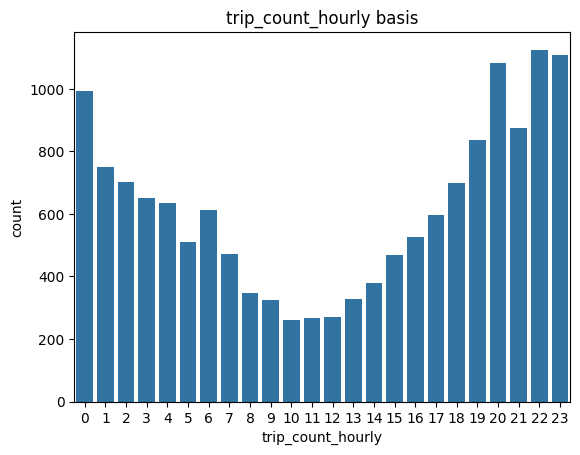

In [ ]:
sns.countplot(x=  dg['trip_count_hourly'])
plt.title('trip_count_hourly basis')
plt.show()

**Key observation:**

The number of trips start increasing after the noon, becomes maximum at 22 hrs (10 P.M.) and then start decreasing.

b) how many trips are created for different days of the month

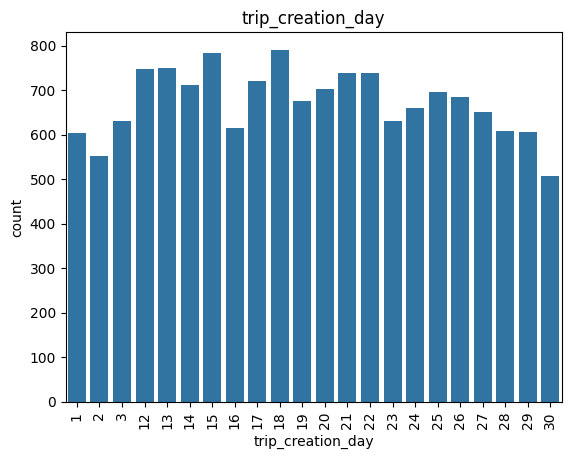

In [ ]:
sns.countplot(data = dg, x = dg['trip_creation_day'])
plt.title('trip_creation_day')
plt.xticks(rotation= 90)
plt.show()

**Key Observation:**

customers usually make more orders in the mid of the month, as most of the trips are created in the mid of the month i.e 18th.


**c) how many trips are created for different weeks**

In [ ]:
dg['trip_creation_week']=dg['trip_creation_time'].dt.isocalendar().week

<Axes: xlabel='trip_creation_week', ylabel='count'>

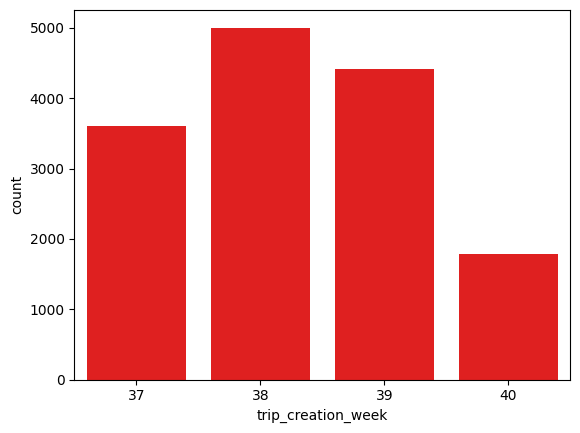

In [ ]:
sns.countplot(x=dg['trip_creation_week'],color ='red' )

**Key Observation:**

most of the trips are created in the 38th week, followed by 39th week.

In [ ]:
plt.bar?

**d) how many trips are created in the given two months**

<Axes: xlabel='trip_creation_month', ylabel='count'>

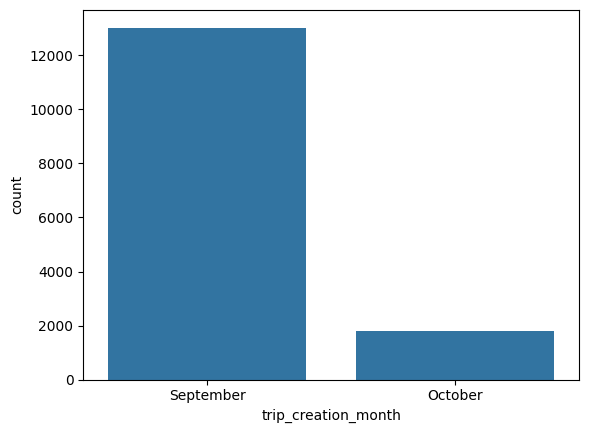

In [ ]:
sns.countplot(x=dg['trip_creation_month'])

In [ ]:
z=dg['trip_creation_month'].value_counts()
z.values

array([13029,  1788])

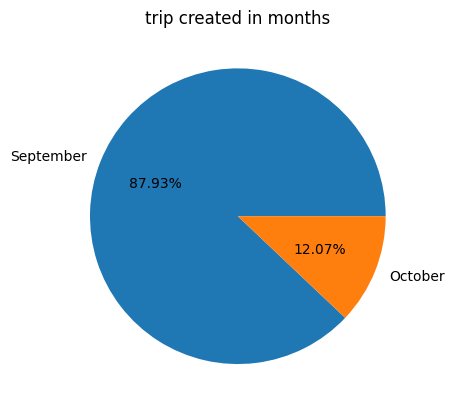

In [ ]:
plt.pie( x =z.values, labels=z.index, autopct = '%.2f%%')
plt.title('trip created in months')
plt.show()

**Key Observation:**

~88 % of the orders created during the month of Septmber

**e) the distribution of trip data for the order**

---



In [ ]:
data = dg['data'].value_counts()
data.values

array([10654,  4163])

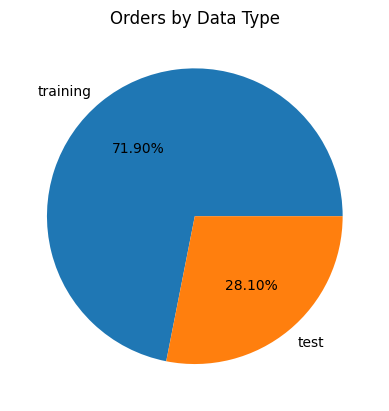

In [ ]:
plt.pie(x= data.values, labels= data.index, autopct="%.2f%%")
plt.title('Orders by Data Type')
plt.show()

**Key Observation:**

~72 % of data pertians to training category

**f) the distribution of route types for the orders**

In [ ]:
route = dg['route_type'].value_counts()

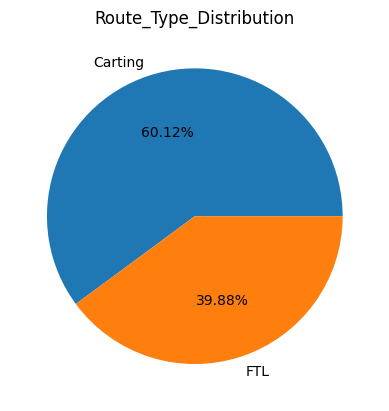

In [ ]:
plt.pie(x= route.values, labels= route.index, autopct = '%.2f%%')
plt.title('Route_Type_Distribution')
plt.show()

**Key Observation:**

~60 % of data pertians to Carting type route

**g) the distribution of number of trips created from different states**

In [ ]:
dg['source_state'].value_counts()

source_state
Maharashtra               2714
Karnataka                 2143
Haryana                   1854
Tamil Nadu                1039
Telangana                  781
Uttar Pradesh              762
Gujarat                    750
Delhi                      728
West Bengal                665
Punjab                     536
Rajasthan                  514
Andhra Pradesh             434
Bihar                      350
Madhya Pradesh             317
Kerala                     289
Assam                      268
Jharkhand                  160
Uttarakhand                114
Orissa                     107
Chandigarh                  93
Goa                         65
Chhattisgarh                43
Himachal Pradesh            34
Jammu & Kashmir             17
Dadra and Nagar Haveli      15
Pondicherry                 12
Nagaland                     5
Arunachal Pradesh            4
Mizoram                      4
Name: count, dtype: int64

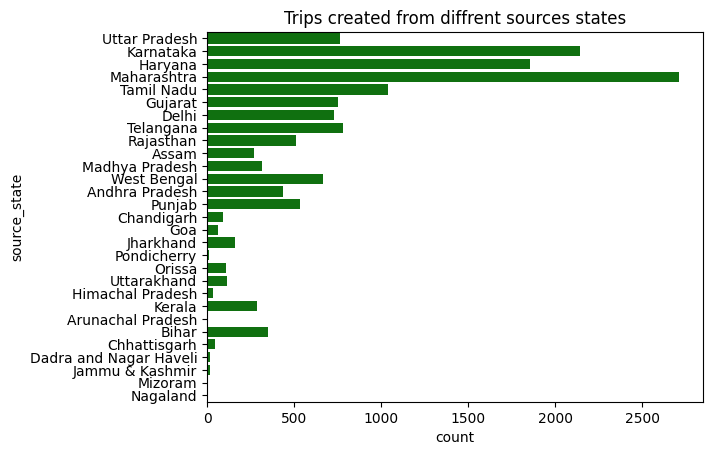

In [ ]:
sns.countplot(y=dg['source_state'], color= 'green')
plt.title('Trips created from diffrent sources states')
plt.show()


**Key Observation:**

maximum trips originated from Maharashtra state followed by Karnataka and Haryana. these states have strong seller base.

**h) top 20 cities based on the number of trips created from different cities**

In [ ]:
source_city = dg['source_City'].value_counts()
source_city = pd.DataFrame(source_city).reset_index()
s=source_city[:20]
s

,source_City,count
0,Gurgaon,1155
1,Bengaluru,1052
2,Bhiwandi,697
3,Mumbai,654
4,Bangalore,648
5,Delhi,551
6,Hyderabad,515
7,Pune,480
8,Chennai,338
9,Mumbai Hub,300


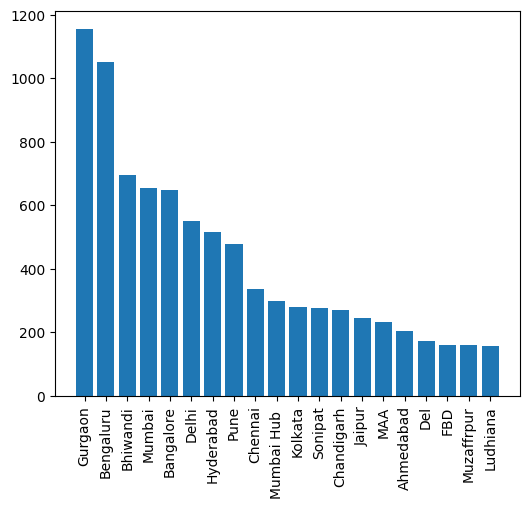

In [ ]:
plt.figure(figsize=(6,5))
plt.bar(x= s['source_City'],height=s['count'])
plt.xticks(rotation = 90)
plt.show()

merging Bengaluru (Bengaluru+ Bangalore), as the cities are same

In [ ]:
s.head()

,source_City,count
0,Gurgaon,1155
1,Bengaluru,1052
2,Bhiwandi,697
3,Mumbai,654
4,Bangalore,648


In [ ]:
s.loc[s['source_City'] == 'Bangalore','source_City'] = 'Bengaluru'

In [ ]:
s

,source_City,count
0,Gurgaon,1155
1,Bengaluru,1052
2,Bhiwandi,697
3,Mumbai,654
4,Bengaluru,648
5,Delhi,551
6,Hyderabad,515
7,Pune,480
8,Chennai,338
9,Mumbai Hub,300


In [ ]:
v=s.groupby('source_City')['count'].sum().reset_index()

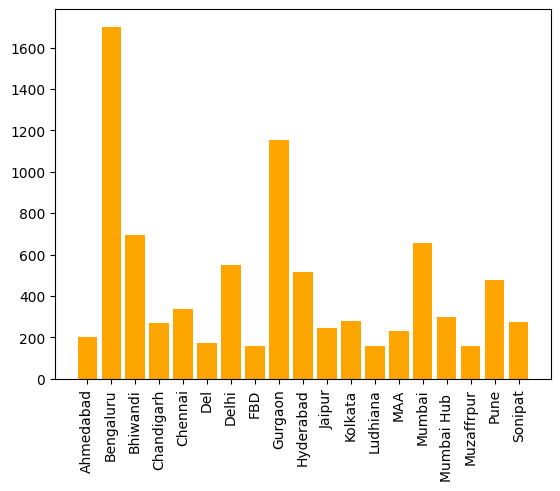

In [ ]:
plt.bar( x=v['source_City'], height = v['count'], color = 'orange')
plt.xticks(rotation = 90)
plt.show()

**Key Observation:**

maximum trips originated from Bengaluru (Bengaluru+ Bangalore) followed by Gurgaon, Bhiwandi,Mumbai,Delhi. That means that the seller base is strong in these cities.

**i) distribution of number of trips which ended in different states**

In [ ]:
dg['dest_state'].value_counts()

dest_state
Maharashtra               2561
Karnataka                 2294
Haryana                   1670
Tamil Nadu                1084
Uttar Pradesh              811
Telangana                  784
Gujarat                    734
West Bengal                697
Delhi                      652
Punjab                     617
Rajasthan                  543
Andhra Pradesh             442
Bihar                      365
Madhya Pradesh             358
Kerala                     270
Assam                      232
Jharkhand                  181
Uttarakhand                122
Orissa                     119
Chandigarh                  65
Goa                         52
Chhattisgarh                43
Himachal Pradesh            42
Arunachal Pradesh           25
Jammu & Kashmir             20
Dadra and Nagar Haveli      17
Meghalaya                    8
Mizoram                      6
Nagaland                     1
Tripura                      1
Daman & Diu                  1
Name: count, dtype: int64

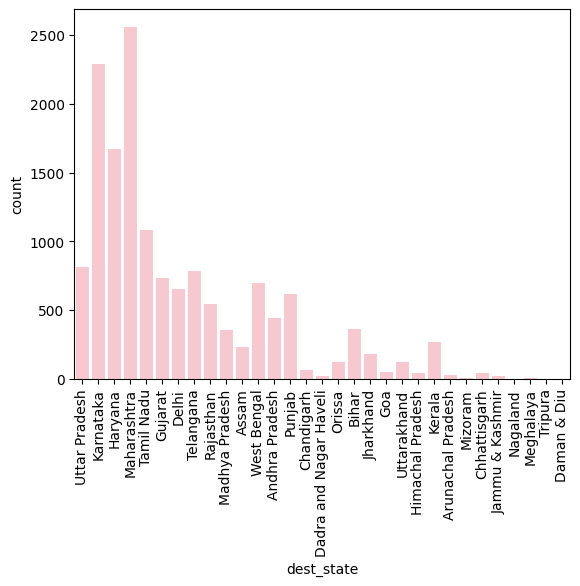

In [ ]:
sns.countplot(x=dg['dest_state'], color = 'pink')
plt.xticks(rotation = 90)

plt.show()

**Key Observation:**

maximum trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high in these states.


# In-depth analysis and feature engineering:

1. Calculate time taken between od_start_time and od_end_time and keep it as a
feature named od_time_diff_hour. Drop the original columns, if required.


In [ ]:
dg['od_time_diff_hour'] = (dg['od_end_time'] -  dg['od_start_time'])
dg['od_time_diff_hour']=dg['od_time_diff_hour'].apply(lambda x : round(x.total_seconds()/ 60.0, 2))

In [ ]:
dg['od_time_diff_hour'].head(20)

0       0.00
1       0.00
2       0.00
3     100.49
4     232.56
5       0.00
6      98.01
7     176.45
8     -29.96
9      49.33
10     72.96
11     38.50
12   -257.59
13    996.22
14    258.80
15    459.72
16    277.00
17    514.62
18     67.04
19    138.73
Name: od_time_diff_hour, dtype: float64

In [ ]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  object        
 2   trip_creation_time              14817 non-null  datetime64[ns]
 3   route_schedule_uuid             14817 non-null  object        
 4   route_type                      14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   od_start_time                   14817 non-null  datetime64[ns]
 10  od_end_time                     14817 non-null  datetime64[ns]
 11  st


b) Compare the difference between Point a.(i.e.od_time_diff_hour) and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

**STEP-1** : Set up Null Hypothesis

**Null Hypothesis ( H0 )**: od_total_time i.e. total trip time and start_scan_to_end_scan i.e. expected total trip time are same.

**Alternate Hypothesis ( HA )** :od_total_time i.e. total trip time and start_scan_to_end_scan i.e. expected total trip time are different.


In [ ]:
dg[['start_scan_to_end_scan','od_time_diff_hour']].describe()

,start_scan_to_end_scan,od_time_diff_hour
count,14817.000000,14817.000000
mean,530.810016,370.647512
std,658.705957,577.239351
min,23.000000,-1690.470000
25%,149.000000,95.110000
50%,280.000000,196.410000
75%,637.000000,404.070000
max,7898.000000,7898.550000


STEP-2 : Checking for basic assumpitons for the hypothesis

Normally distributed Data: QQ Plot
Homogeneity of Variances : Lavene's test

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

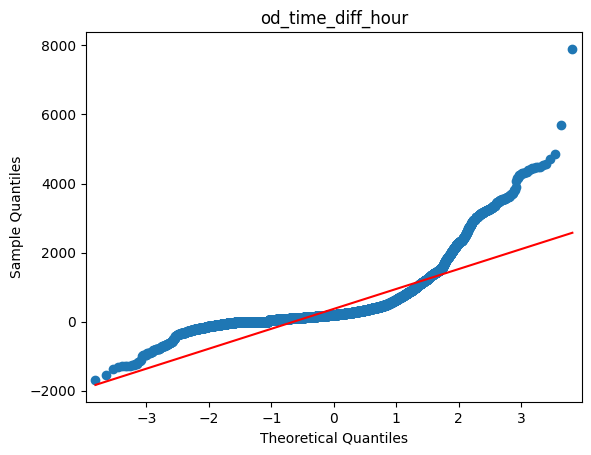

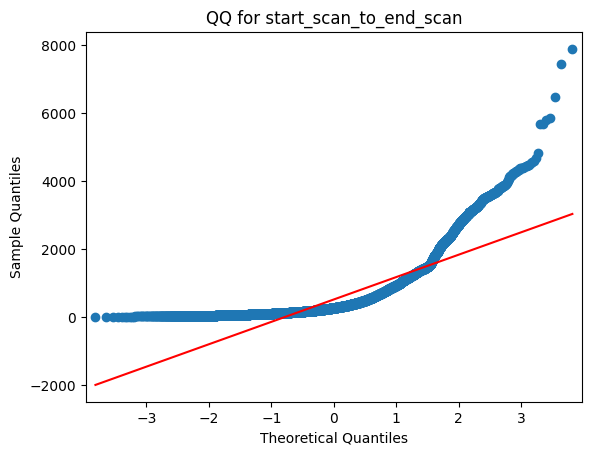

In [ ]:
sm.qqplot(dg['od_time_diff_hour'],line='s')
plt.title('od_time_diff_hour')
plt.show()


sm.qqplot(dg['start_scan_to_end_scan'],line='s')
plt.title('QQ for start_scan_to_end_scan')
plt.show()


With the help of qqplot we can identift the data is not normally distributed.

In [ ]:
from scipy.stats import levene

In [ ]:
levene(dg['start_scan_to_end_scan'],dg['od_time_diff_hour'])

LeveneResult(statistic=119.87144095407112, pvalue=7.632386965061762e-28)

Here the p value is very less as compared to significane level.
so we can reject null hypothesis which means accepting alternate hypothesis i.e the variance among the both group is not same.

STEP-3 : Define Test statistics;

Distribution of T under H0.
If the assumptions of T Test are met then will perform for T independent Test for samples. else will perform the non parametric test equivalent to T Test for independent sample i.e., kruskal wallis test

In [ ]:
from scipy.stats import kruskal

STEP-4: Compute the p-value and fix value of alpha.

setting alpha to be 0.05
STEP-5: Compare p-value and alpha.

Based on p-value, accept or reject H0.


In [ ]:
K_statistic, pvalue =kruskal(dg['start_scan_to_end_scan'],dg['od_time_diff_hour'])

In [ ]:
K_statistic, pvalue

(1111.6453568056052, 9.724000731309292e-244)

In [ ]:
alpha =0.05

In [ ]:
if pvalue< alpha :
 print('Reject Null Hypothesis')
else:
  print('Fail to reject null Hypothesis')

Reject Null Hypothesis


Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [ ]:
dg[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.143754,162.071202
std,561.396157,272.304633
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,169.000000
max,6265.000000,2032.000000


Checking for the normality distribution

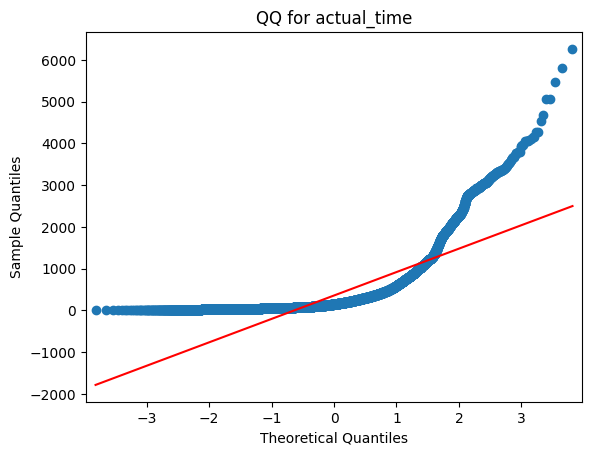

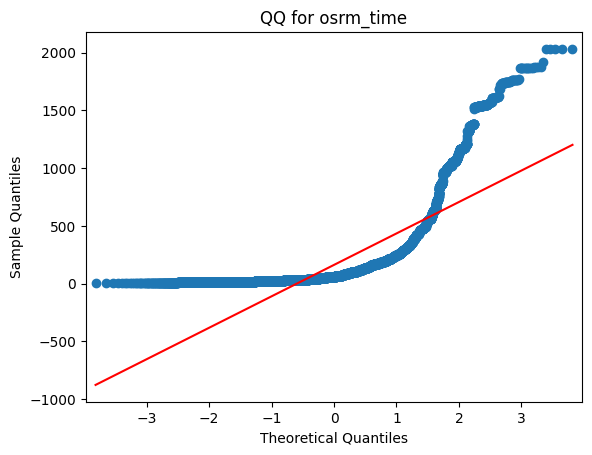

In [ ]:
sm.qqplot(dg['actual_time'],line='s')
plt.title('QQ for actual_time')
plt.show()


sm.qqplot(dg[ 'osrm_time'],line='s')
plt.title('QQ for osrm_time')
plt.show()

 Data does not follow normal distribution

Kruskal wallis Test- It is because data does not follow normal distribution to apply t- test

In [ ]:

k_stat, p_val = kruskal(dg['actual_time'], dg['osrm_time'])

print(f"k_stat : {k_stat}")
print(f"p-value : {p_val}")
print()
if p_val < 0.05:
    print('Reject H0: samples of actual_time  and osrm_time time  are different.')
else:
    print('Fail to reject H0:  samples of actual_time and osrm_time are similar.')

k_stat : 3363.9317112678514
p-value : 0.0

Reject H0: samples of actual_time  and osrm_time time  are different.


Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)


In [ ]:
dg[['actual_time','segment_actual_time']]

,actual_time,segment_actual_time
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14812,83.0,82.0
14813,21.0,21.0
14814,282.0,281.0
14815,264.0,258.0


In [ ]:
dg[['actual_time','segment_actual_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,14817.0,357.143754,561.396157,9.0,67.0,149.0,370.0,6265.0
segment_actual_time,14817.0,353.892286,556.247965,9.0,66.0,147.0,367.0,6230.0


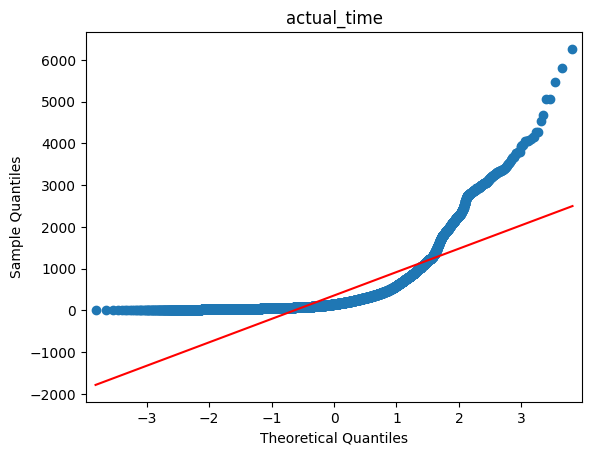

In [ ]:
sm.qqplot(dg['actual_time'], line= 's')
plt.title('actual_time')
plt.show()

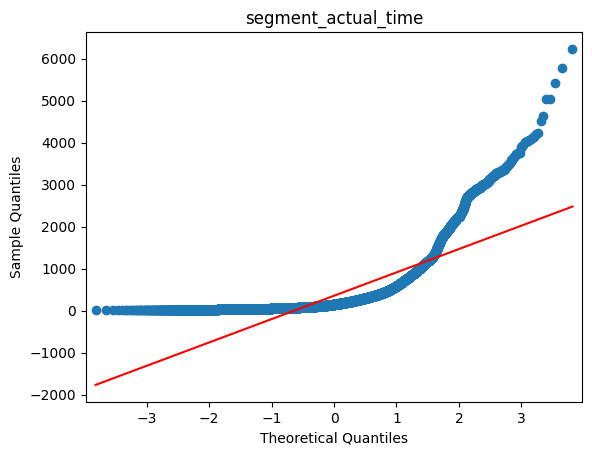

In [ ]:
sm.qqplot(dg['segment_actual_time'], line= 's')
plt.title('segment_actual_time')
plt.show()

Data is not normally distributed

In [ ]:
alpha= 0.05
k_stat,pvalue= kruskal(dg['actual_time'],dg['segment_actual_time'])
print(f"k_stat : {k_stat}")
print(f"p-value : {p_val}")
print()
if p_val < 0.05:
    print('Reject H0: samples of actual_time  and segment_actual__time are different.')
else:
    print('Fail to reject H0:  samples of actual_time and segment_actual_time are similar.')

k_stat : 0.6603876360800134
p-value : 0.0

Reject H0: samples of actual_time  and segment_actual__time are different.


**Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
dg[['osrm_distance','segment_osrm_distance']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_distance,14817.0,205.101357,370.780010,9.0729,30.9418,65.8826,209.3005,2840.0810
segment_osrm_distance,14817.0,223.201161,416.628374,9.0729,32.6545,70.1544,218.8024,3523.6324


Lets check through shapiro wilks Test for normality distribution of data/

In [ ]:
from scipy.stats import shapiro

In [ ]:
s_stats,p_value = shapiro(dg['osrm_distance'])
print(f's_stats:{s_stats}')
print(f'p_value:{p_value}')

s_stats:0.5237942934036255
p_value:0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
s_stats,p_value = shapiro(dg['segment_osrm_distance'])
print(f's_stats:{s_stats}')
print(f'p_value:{p_value}')

s_stats:0.5084271430969238
p_value:0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


hence reject null hypothesis it does not follow normal distribution.

In [ ]:
kruskal(dg['osrm_distance'],dg['segment_osrm_distance'])

KruskalResult(statistic=19.189169264591182, pvalue=1.1838316476705933e-05)

p_ value  is very small hence reject null hypothesis, osrm_distance and segment_ossrm_distance is significantly diffrent.


**Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
dg[['osrm_time','segment_osrm_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_time,14817.0,162.071202,272.304633,6.0,29.0,60.0,169.0,2032.0
segment_osrm_time,14817.0,180.949787,314.542047,6.0,31.0,65.0,185.0,2564.0


# Outlier Detection & Treatment
# a. Find any existing outliers in numerical features.



In [ ]:
# filter the numeric variables from the data
df_num = dg.select_dtypes(include = np.number)

In [ ]:
df_num

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_day,trip_creation_week,od_time_diff_hour
0,2259.0,824.732854,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733,2018,12,37,0.00
1,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,2018,12,37,0.00
2,3933.0,1932.273969,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678,2018,12,37,0.00
3,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2018,12,37,100.49
4,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,2018,12,37,232.56
...,...,...,...,...,...,...,...,...,...,...,...,...
14812,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,2018,3,40,405.49
14813,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,2018,3,40,60.59
14814,421.0,38.684839,282.0,54.0,63.2841,281.0,88.0,104.8866,2018,3,40,0.00
14815,347.0,134.723836,264.0,184.0,177.6635,258.0,221.0,223.5324,2018,3,40,149.83


In [ ]:
df_num.columns

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'trip_creation_year',
       'trip_creation_day', 'od_time_diff_hour'],
      dtype='object')

In [ ]:
df_num.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_day,od_time_diff_hour
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.0,14817.000000,14817.000000
mean,530.810016,164.683253,357.143754,162.071202,205.101357,353.892286,180.949787,223.201161,2018.0,18.370790,370.647512
std,658.705957,305.561572,561.396157,272.304633,370.780010,556.247965,314.542047,416.628374,0.0,7.893275,577.239351
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,2018.0,1.000000,-1690.470000
25%,149.000000,22.860030,67.000000,29.000000,30.941800,66.000000,31.000000,32.654500,2018.0,14.000000,95.110000
50%,280.000000,48.499937,149.000000,60.000000,65.882600,147.000000,65.000000,70.154400,2018.0,19.000000,196.410000
75%,637.000000,164.853324,370.000000,169.000000,209.300500,367.000000,185.000000,218.802400,2018.0,25.000000,404.070000
max,7898.000000,2187.483994,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,2018.0,30.000000,7898.550000


# b. Visualize the outlier values using Boxplot.

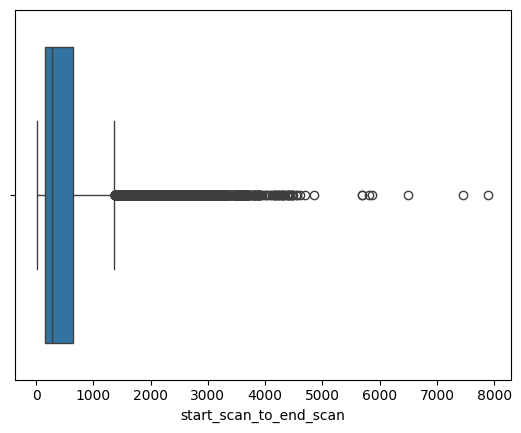

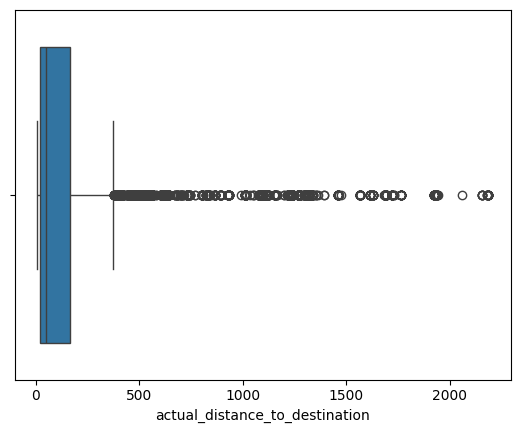

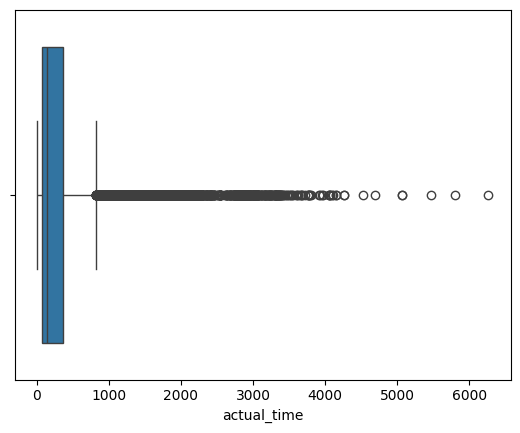

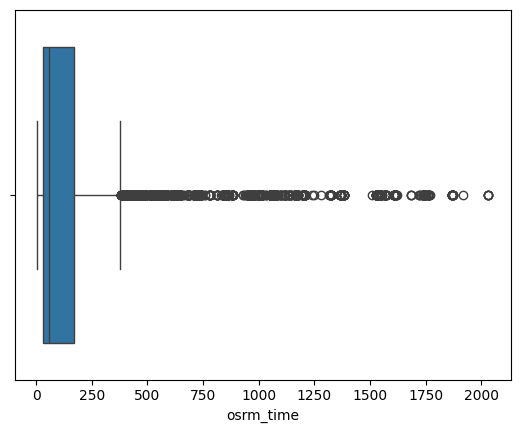

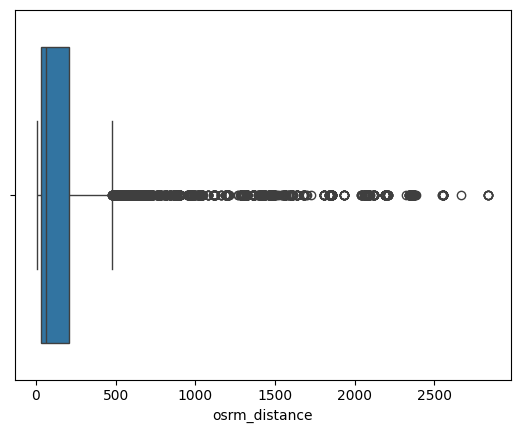

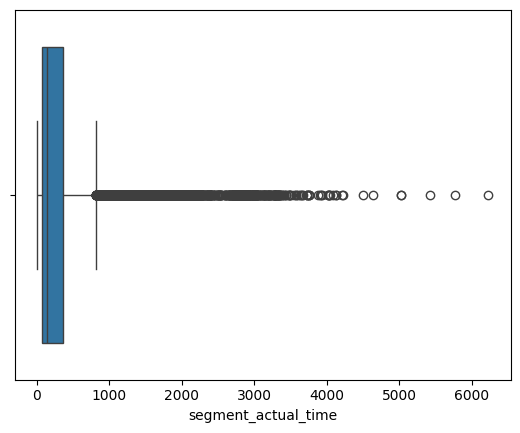

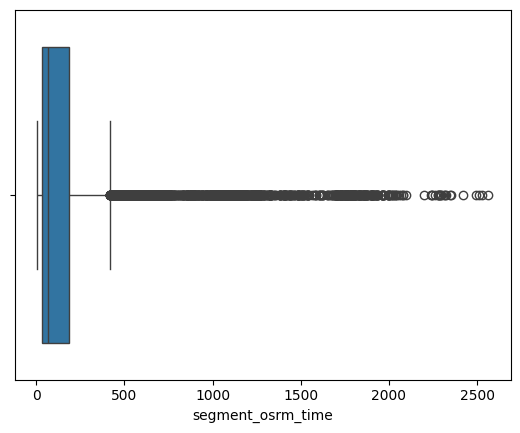

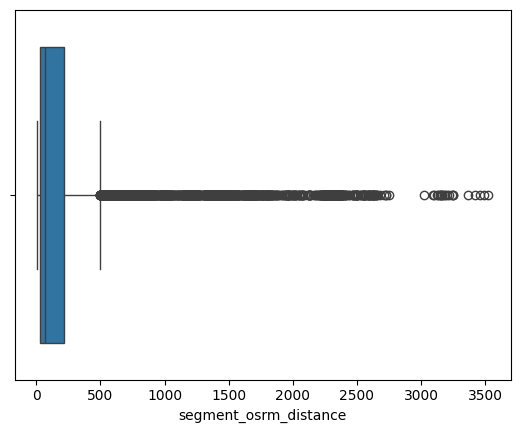

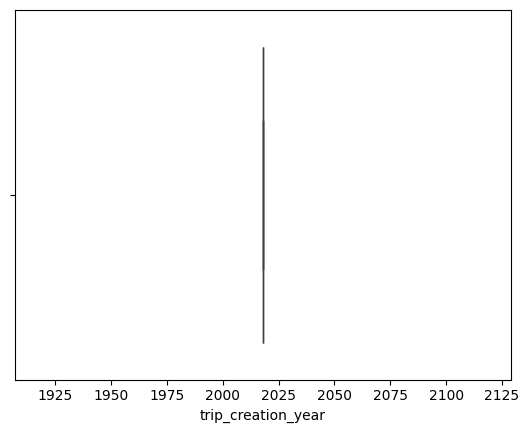

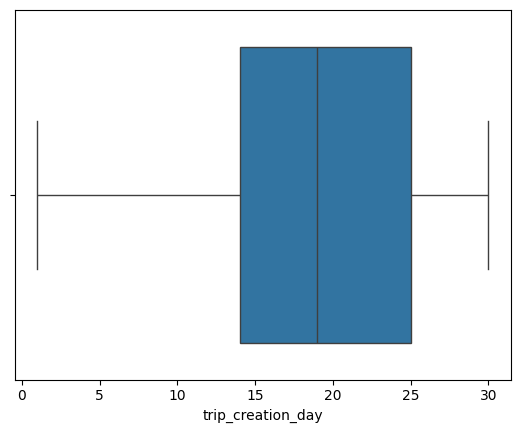

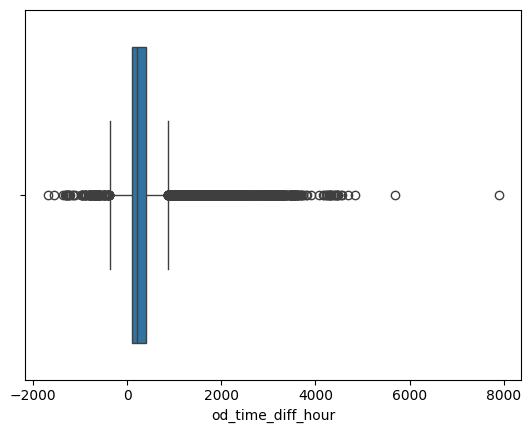

In [ ]:
for col in enumerate(df_num):
    sns.boxplot( x=col[1], data = df_num)
    plt.show()

**Key Observation:**

It can be observed from the above plots that data in all the numerical columns are right skewed. It can be inffered that outlire are prent in the data set.

# c. Handle the outliers using the IQR method.

In [ ]:
# Detecting Outliers
for col in df_num:
  print(f"\nOutliers for {col}")
  print()
  Q1 = df_num[col].quantile(0.25)
  Q2 = df_num[col].median()
  Q3 = df_num[col].quantile(0.75)
  IQR = Q3 - Q1
  Minl = Q1 - (1.5 * IQR)
  Maxl = Q3 + (1.5 * IQR)
  outls = df_num[(df_num[col] < Minl) | (df_num[col] > Maxl)]
  outl_count = len(outls)
  perout = round(outl_count/len(df_num[col])*100,2)
  print(f"Min Limit: {Minl.round(2)} \nQ1 : {Q1.round(2)}\nMedian : {Q2.round(2)}\nQ3 : {Q3.round(2)}\nIQR : {IQR.round(2)}\nMax Limit: {Maxl.round(2)}")
  print(f"Number of Outliers: {outl_count}")
  print(f"Percentage of Outliers: {perout} %")
  print("-"*50)


Outliers for start_scan_to_end_scan

Min Limit: -583.0 
Q1 : 149.0
Median : 280.0
Q3 : 637.0
IQR : 488.0
Max Limit: 1369.0
Number of Outliers: 1267
Percentage of Outliers: 8.55 %
--------------------------------------------------

Outliers for actual_distance_to_destination

Min Limit: -190.13 
Q1 : 22.86
Median : 48.5
Q3 : 164.85
IQR : 141.99
Max Limit: 377.84
Number of Outliers: 1449
Percentage of Outliers: 9.78 %
--------------------------------------------------

Outliers for actual_time

Min Limit: -387.5 
Q1 : 67.0
Median : 149.0
Q3 : 370.0
IQR : 303.0
Max Limit: 824.5
Number of Outliers: 1643
Percentage of Outliers: 11.09 %
--------------------------------------------------

Outliers for osrm_time

Min Limit: -181.0 
Q1 : 29.0
Median : 60.0
Q3 : 169.0
IQR : 140.0
Max Limit: 379.0
Number of Outliers: 1516
Percentage of Outliers: 10.23 %
--------------------------------------------------

Outliers for osrm_distance

Min Limit: -236.6 
Q1 : 30.94
Median : 65.88
Q3 : 209.3
IQR : 17

**Key Observation:**

Outliers are prevalent across all fields: ranges from 8.54% to 11.09%.

Outliers in field are closely related, such as od_total_time and start_scan_to_end_scan, as well as actual_time and segment_actual_time, have nearly identical counts and percentages of outliers, reflecting their inherent correlation.

The upper limits for outliers are substantially high across fields, showing that extreme values can be quite large compared to the median and quartile values. For example, osrm_distance has a maximum limit of 474.93, which is significantly higher than its Q3 of 208.48.

In view of above it seems that the outliers present in sample data may be true values. therefore it leaving those data as is in the dataset. (refernce also drwan from multiple studies)

**Do one-hot encoding of categorical variables (like route_type)**

In [ ]:
df_new = pd.get_dummies(dg, columns=["route_type"])
df_new.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,source_state,source_City,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,od_time_diff_hour,route_type_Carting,route_type_FTL
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,...,Uttar Pradesh,Kanpur,Central,H_6,2018,September,12,0.00,False,True
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,...,Karnataka,Doddablpur,ChikaDPP,D,2018,September,12,0.00,True,False
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,...,Haryana,Gurgaon,Bilaspur,HB,2018,September,12,0.00,False,True
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,...,Maharashtra,Mumbai Hub,None,None,2018,September,12,100.49,True,False
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,...,Karnataka,Bellary,Dc,None,2018,September,12,232.56,False,True


In [ ]:
df_new1= pd.get_dummies(dg, columns= ['data'])
df_new1.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,source_state,source_City,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,od_time_diff_hour,data_test,data_training
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,...,Uttar Pradesh,Kanpur,Central,H_6,2018,September,12,0.00,False,True
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,...,Karnataka,Doddablpur,ChikaDPP,D,2018,September,12,0.00,False,True
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,...,Haryana,Gurgaon,Bilaspur,HB,2018,September,12,0.00,False,True
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,...,Maharashtra,Mumbai Hub,None,None,2018,September,12,100.49,False,True
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,...,Karnataka,Bellary,Dc,None,2018,September,12,232.56,False,True


**Key Observation:**

converted the varible throught one hot encoding : Ture(1)/False(0)
with fields:

data : test,training


route_type : Carting,FTL



**Business Insights**

The data covers the period from '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.

There are approximately 14,817 unique trip IDs, 1,508 unique source centers, 1,481 unique destination centers, 690 unique source cities, and 806 unique destination cities.

The data is missing the names of 14 unique location IDs.

The statistically similar features

start_scan_to_end_scan and od_total_time (created one).

start_scan_to_end_scan and segment_actual_time

The statistically diffrent feature

actual_time and osrm_time.

osrm_distance and segment_osrm_distance.

osrm_time and segment_osrm_time.

The majority of the data is intended for testing rather than training. Carting is the most frequently observed route type.

The number of trips starts to increase after noon, peaks at 22:00 hrs (10 P.M.), and then begins to decrease.

The highest number of trips occurred in the 38th week.

Orders tend to peak in the middle of the month, indicating a trend where customers place more orders during this time.

The majority of orders originate from states such as Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana.

The highest number of trips conclude in Maharashtra, followed by Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh, indicating a high volume of orders in these states.

Bengaluru (Bengaluru + Bangalore)is the city with the highest number of trip completions, followed by Mumbai, Gurgaon, Delhi, and Chennai, showing a high volume of orders in these cities.

Bengaluru (Bengaluru + Bangalore) is the top city for trip origins, followed by Mumbai, Gurgaon, Delhi, and Bhiwandi, indicating a strong seller base in these cities.

The majority of orders are destined for cities such as Bengaluru (Bengaluru + Bangalore), Mumbai, Gurgaon, and Delhi.



**Recommendations**

Enhance OSRM Trip Planning System: The OSRM trip planning system requires improvements to address discrepancies. Ensuring the routing engine is configured for optimal results will benefit transporters and enhance overall efficiency.

Focus on High-Order States: The majority of orders originate from and are delivered to states like Maharashtra, Karnataka, Haryana, and Tamil Nadu. Enhancing existing corridors in these areas can further improve market penetration and efficiency.

Customer Profiling in Key States: Conducting customer profiling in states such as Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh can provide insights into why these areas generate major orders. This information can be used to enhance the buying and delivery experience for customers in these regions.

Align Actual and Predicted Times: The team should focus on reducing the differences between osrm_time and actual_time to provide more accurate delivery time predictions, thereby improving customer satisfaction.

Improve Route Accuracy: The discrepancies between osrm_distance and the actual distance covered suggest either deviations from the predefined routes by delivery personnel or inaccuracies in the OSRM routing predictions. The team should investigate and rectify these issues to prevent delays and ensure efficient routing based on distance, traffic, and other factors.

Plan for State-Specific Challenges: Consider the heavy traffic and challenging terrain conditions in certain states. This will be crucial for planning and meeting demand, especially during peak festival seasons, ensuring smooth and timely deliveries.

Data Set: For indepth alaysis data period may be increased as the given dataset is only for two month.

Platform Improvement: For better monitoring(dashboard) and operations, manual entry for city and place codes should be avoided. For example, both "Bengaluru" and "Bangalore" refer to the same destination and have significant trip data, but the system may not accurately detect the actual traffic if these names are not uniquely standardized.